In [ ]:
pip install pycaret[full]

In [ ]:
import pandas as pd

data = pd.read_csv('winequality-white.csv', sep=';', quotechar=None, quoting=3)
data.columns = data.columns.str.strip('"')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


<h1> <b> Setup </b> </h1>

In [ ]:
from pycaret.regression import *
s = setup(data, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [ ]:
# init setup on exp
exp.setup(data, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


<h1> <b> Compare Models </b> </h1>

In [ ]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2268,0.0976,0.3112,0.9345,0.0270,0.0216,3.5250
lightgbm,Light Gradient Boosting Machine,0.2440,0.1098,0.3304,0.9265,0.0286,0.0232,0.7440
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.3290
rf,Random Forest Regressor,0.2449,0.1242,0.3510,0.9167,0.0302,0.0231,1.7720
et,Extra Trees Regressor,0.2261,0.1252,0.3522,0.9160,0.0303,0.0213,0.9210
gbr,Gradient Boosting Regressor,0.2969,0.1538,0.3913,0.8967,0.0339,0.0284,0.4820
dt,Decision Tree Regressor,0.3049,0.2404,0.4888,0.8389,0.0420,0.0288,0.0410
lr,Linear Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.8830
br,Bayesian Ridge,0.3045,0.2410,0.4516,0.8337,0.0355,0.0293,0.0400
ada,AdaBoost Regressor,0.4811,0.3440,0.5863,0.7692,0.0518,0.0471,0.2560


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP
exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2268,0.0976,0.3112,0.9345,0.0270,0.0216,3.6550
lightgbm,Light Gradient Boosting Machine,0.2440,0.1098,0.3304,0.9265,0.0286,0.0232,0.8280
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.1780
rf,Random Forest Regressor,0.2449,0.1242,0.3510,0.9167,0.0302,0.0231,1.6150
et,Extra Trees Regressor,0.2261,0.1252,0.3522,0.9160,0.0303,0.0213,1.1650
gbr,Gradient Boosting Regressor,0.2969,0.1538,0.3913,0.8967,0.0339,0.0284,0.4290
dt,Decision Tree Regressor,0.3049,0.2404,0.4888,0.8389,0.0420,0.0288,0.0740
lr,Linear Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.0430
br,Bayesian Ridge,0.3045,0.2410,0.4516,0.8337,0.0355,0.0293,0.0470
ada,AdaBoost Regressor,0.4811,0.3440,0.5863,0.7692,0.0518,0.0471,0.3330


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

<h1> <b> Analyze Model </b> </h1>

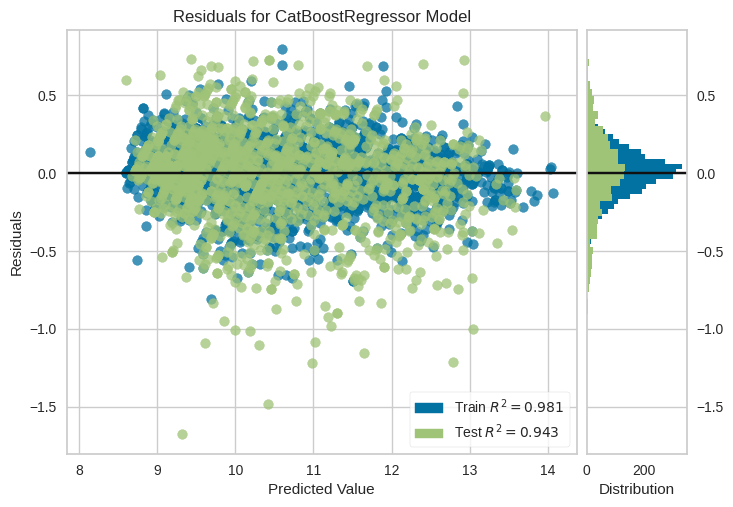

In [ ]:
# plot residuals
plot_model(best, plot = 'residuals')

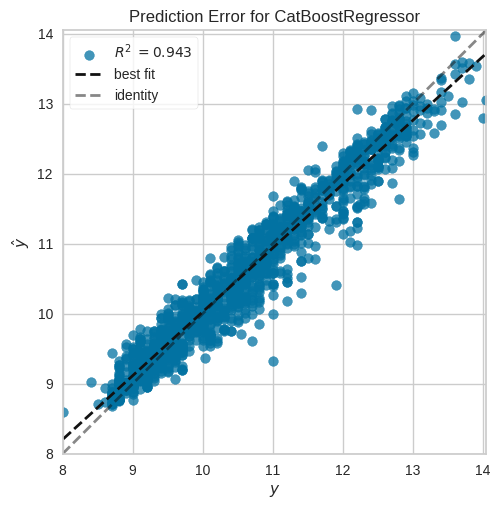

In [ ]:
# plot error
plot_model(best, plot = 'error')

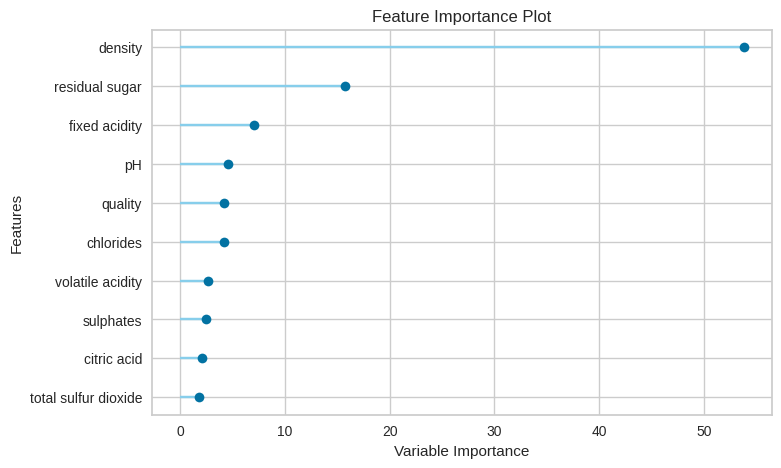

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<h1> <b> Prediction </b> </h1>

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.2182,0.0875,0.2958,0.9426,0.0254,0.0206


In [ ]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
1088,7.4,0.20,0.37,16.950001,0.048,43.0,190.0,0.99950,3.03,0.42,6,9.2,9.057452
4366,5.9,0.29,0.28,3.200000,0.035,16.0,117.0,0.98959,3.26,0.42,6,12.6,12.605241
92,6.9,0.24,0.33,1.700000,0.035,47.0,136.0,0.99000,3.26,0.40,7,12.6,12.530360
2901,6.5,0.22,0.32,2.200000,0.028,36.0,92.0,0.99076,3.27,0.59,7,11.9,11.750765
2330,7.5,0.38,0.29,12.700000,0.050,25.0,209.0,0.99860,3.25,0.59,6,9.3,9.474333


In [ ]:
# copy data and drop alcohol

new_data = data.copy()
new_data.drop('alcohol', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,6


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,prediction_label
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,6,8.790362
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,6,9.555366
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,6,10.365011
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,6,10.021636
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,6,10.021636


<h1> <b> Save Model </b> </h1>

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7ef3f8bd29b0>)

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7ef3f8afc490>)])

# 👇 Detailed function-by-function overview

## ✅ Setup

In [ ]:
s = setup(data, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
# lets access X_train_transformed
get_config('X_train_transformed')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
773,6.1,0.27,0.30,16.700001,0.039,49.0,172.0,0.99985,3.40,0.45,5.0
3019,7.2,0.32,0.30,8.250000,0.020,14.0,104.0,0.99362,2.99,0.44,6.0
3164,7.8,0.30,0.36,4.600000,0.024,20.0,198.0,0.99222,3.06,0.66,6.0
445,7.1,0.32,0.32,11.000000,0.038,16.0,66.0,0.99370,3.24,0.40,3.0
3890,6.4,0.38,0.26,8.200000,0.043,28.0,98.0,0.99234,2.99,0.31,6.0
...,...,...,...,...,...,...,...,...,...,...,...
1593,8.6,0.16,0.49,7.300000,0.043,9.0,63.0,0.99530,3.13,0.59,6.0
4060,6.4,0.41,0.01,6.100000,0.048,20.0,70.0,0.99362,3.19,0.42,5.0
1346,7.0,0.46,0.39,6.200000,0.039,46.0,163.0,0.99280,3.21,0.35,7.0
3454,5.8,0.54,0.00,1.400000,0.033,40.0,107.0,0.98918,3.26,0.35,5.0


In [ ]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [ ]:
# init setup with normalize = True
s = setup(data, target = 'alcohol', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


<AxesSubplot: >

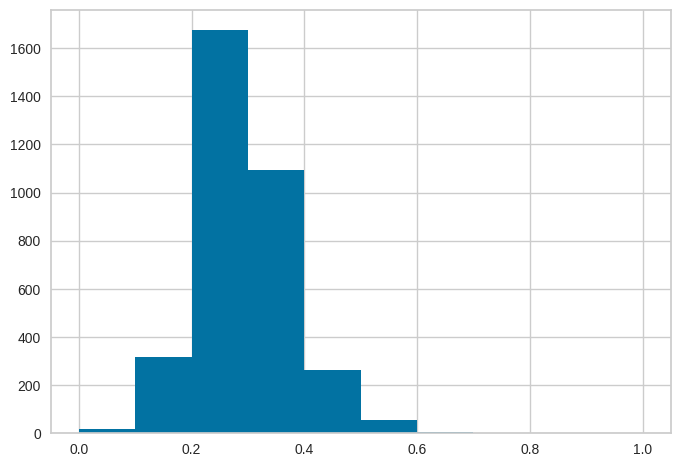

In [ ]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['fixed acidity'].hist()

<AxesSubplot: >

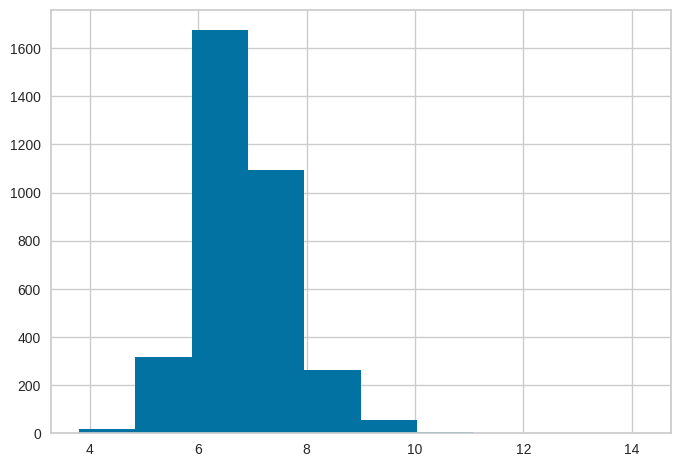

In [ ]:
get_config('X_train')['fixed acidity'].hist()

## ✅ Compare Models

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2269,0.0976,0.3112,0.9345,0.0270,0.0216,3.2850
lightgbm,Light Gradient Boosting Machine,0.2442,0.1103,0.3312,0.9262,0.0286,0.0232,0.7050
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.3280
rf,Random Forest Regressor,0.2450,0.1243,0.3511,0.9167,0.0302,0.0232,1.8720
et,Extra Trees Regressor,0.2263,0.1256,0.3529,0.9157,0.0304,0.0214,0.8160
gbr,Gradient Boosting Regressor,0.2968,0.1538,0.3912,0.8968,0.0339,0.0284,0.6370
dt,Decision Tree Regressor,0.3049,0.2406,0.4889,0.8388,0.0421,0.0288,0.0470
huber,Huber Regressor,0.2817,0.2378,0.4404,0.8352,0.0344,0.0271,0.0920
lar,Least Angle Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.0540
lr,Linear Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.0530


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2269,0.0976,0.3112,0.9345,0.0270,0.0216,3.6830
lightgbm,Light Gradient Boosting Machine,0.2442,0.1103,0.3312,0.9262,0.0286,0.0232,0.5950
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.2240
rf,Random Forest Regressor,0.2450,0.1243,0.3511,0.9167,0.0302,0.0232,1.8470
et,Extra Trees Regressor,0.2263,0.1256,0.3529,0.9157,0.0304,0.0214,0.9710
gbr,Gradient Boosting Regressor,0.2968,0.1538,0.3912,0.8968,0.0339,0.0284,0.8110
dt,Decision Tree Regressor,0.3049,0.2406,0.4889,0.8388,0.0421,0.0288,0.0850


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
compare_tree_models

In [ ]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2269,0.0976,0.3112,0.9345,0.0270,0.0216,3.683
lightgbm,Light Gradient Boosting Machine,0.2442,0.1103,0.3312,0.9262,0.0286,0.0232,0.595
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.224
rf,Random Forest Regressor,0.2450,0.1243,0.3511,0.9167,0.0302,0.0232,1.847
et,Extra Trees Regressor,0.2263,0.1256,0.3529,0.9157,0.0304,0.0214,0.971
gbr,Gradient Boosting Regressor,0.2968,0.1538,0.3912,0.8968,0.0339,0.0284,0.811
dt,Decision Tree Regressor,0.3049,0.2406,0.4889,0.8388,0.0421,0.0288,0.085


In [ ]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2263,0.1256,0.3529,0.9157,0.0304,0.0214,0.7040
catboost,CatBoost Regressor,0.2269,0.0976,0.3112,0.9345,0.0270,0.0216,3.3550
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.2830
lightgbm,Light Gradient Boosting Machine,0.2442,0.1103,0.3312,0.9262,0.0286,0.0232,0.2630
rf,Random Forest Regressor,0.2450,0.1243,0.3511,0.9167,0.0302,0.0232,2.0050
huber,Huber Regressor,0.2817,0.2378,0.4404,0.8352,0.0344,0.0271,0.0950
gbr,Gradient Boosting Regressor,0.2968,0.1538,0.3912,0.8968,0.0339,0.0284,0.7900
lr,Linear Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.0330
lar,Least Angle Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.0310
br,Bayesian Ridge,0.3045,0.2410,0.4516,0.8337,0.0355,0.0293,0.0310


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [ ]:
# list of top 3 models by MAE
best_mae_models_top3

[ExtraTreesRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...)]

## ✅ Experiment Logging

In [ ]:
from pycaret.regression import *
s = setup(data, target = 'alcohol', log_experiment='mlflow', experiment_name='insurance_experiment')

,Description,Value
0,Session id,1073
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


2023/11/19 04:31:39 INFO mlflow.tracking.fluent: Experiment with name 'insurance_experiment' does not exist. Creating a new experiment.


In [ ]:
# compare models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2245,0.0932,0.3049,0.9387,0.0263,0.0213,3.5200
lightgbm,Light Gradient Boosting Machine,0.2433,0.1078,0.3281,0.9290,0.0283,0.0231,0.3450
xgboost,Extreme Gradient Boosting,0.2329,0.1131,0.3355,0.9253,0.0288,0.0220,0.2580
rf,Random Forest Regressor,0.2469,0.1257,0.3542,0.9172,0.0304,0.0233,2.0060
et,Extra Trees Regressor,0.2285,0.1270,0.3557,0.9166,0.0306,0.0215,0.7040
gbr,Gradient Boosting Regressor,0.3011,0.1539,0.3920,0.8988,0.0340,0.0287,0.8080
lr,Linear Regression,0.2981,0.2317,0.4419,0.8508,0.0351,0.0287,0.0270
lar,Least Angle Regression,0.2981,0.2317,0.4419,0.8508,0.0351,0.0287,0.0250
br,Bayesian Ridge,0.2983,0.2318,0.4421,0.8508,0.0351,0.0287,0.0250
dt,Decision Tree Regressor,0.3167,0.2604,0.5093,0.8279,0.0438,0.0298,0.0430


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
#start mlflow server on localhost:5000
#!mlflow ui

[2023-11-19 04:33:26 +0000] [6639] [INFO] Starting gunicorn 20.1.0
[2023-11-19 04:33:26 +0000] [6639] [INFO] Listening at: http://127.0.0.1:5000 (6639)
[2023-11-19 04:33:26 +0000] [6639] [INFO] Using worker: sync
[2023-11-19 04:33:26 +0000] [6644] [INFO] Booting worker with pid: 6644

[2023-11-19 04:40:37 +0000] [6639] [INFO] Handling signal: int
Aborted!
[2023-11-19 04:40:37 +0000] [6644] [INFO] Worker exiting (pid: 6644)
[2023-11-19 04:40:38 +0000] [6639] [INFO] Shutting down: Master


## ✅ Create Model

In [ ]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2816,0.1380,0.3715,0.9113,0.0329,0.0271
1,0.3216,0.1590,0.3987,0.9007,0.0355,0.0314
2,0.3011,0.1438,0.3792,0.9016,0.0337,0.0290
3,0.3078,0.1400,0.3741,0.9131,0.0327,0.0295
4,0.2846,0.1302,0.3609,0.9127,0.0315,0.0273
5,0.2726,0.1296,0.3600,0.9121,0.0317,0.0262
6,0.2835,0.1269,0.3563,0.9115,0.0317,0.0276
7,0.3154,0.1669,0.4085,0.8786,0.0388,0.0309
8,0.2908,0.1582,0.3977,0.9020,0.0368,0.0276


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2816,0.1380,0.3715,0.9113,0.0329,0.0271
1,0.3216,0.1590,0.3987,0.9007,0.0355,0.0314
2,0.3011,0.1438,0.3792,0.9016,0.0337,0.0290
3,0.3078,0.1400,0.3741,0.9131,0.0327,0.0295
4,0.2846,0.1302,0.3609,0.9127,0.0315,0.0273
5,0.2726,0.1296,0.3600,0.9121,0.0317,0.0262
6,0.2835,0.1269,0.3563,0.9115,0.0317,0.0276
7,0.3154,0.1669,0.4085,0.8786,0.0388,0.0309
8,0.2908,0.1582,0.3977,0.9020,0.0368,0.0276


In [ ]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3141,0.1559,0.3948,0.8969,0.0350,0.0304
1,0.2973,0.1423,0.3772,0.9078,0.0331,0.0286
2,0.2890,0.4207,0.6486,0.7242,0.0401,0.0276
Mean,0.3001,0.2396,0.4736,0.8430,0.0360,0.0289
Std,0.0105,0.1282,0.1240,0.0841,0.0030,0.0012


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7007,0.7953,0.8918,0.4887,0.0767,0.0664
1,0.7317,0.8306,0.9114,0.4811,0.0797,0.0706
2,0.7241,0.7939,0.8910,0.4568,0.0771,0.0691
3,0.6888,0.7558,0.8694,0.5306,0.0738,0.0650
4,0.7100,0.7799,0.8831,0.4769,0.0762,0.0677
5,0.7262,0.7927,0.8904,0.4620,0.0767,0.0692
6,0.6787,0.7202,0.8486,0.4977,0.0738,0.0656
7,0.6812,0.7134,0.8446,0.4809,0.0744,0.0660
8,0.7002,0.7576,0.8704,0.5308,0.0742,0.0654


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

In [ ]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

## ✅ Tune Model

In [ ]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3126,0.2558,0.5058,0.8355,0.0440,0.0296
1,0.2788,0.2414,0.4914,0.8492,0.0420,0.0261
2,0.3585,0.3349,0.5787,0.7708,0.0504,0.0339
3,0.2914,0.2145,0.4632,0.8668,0.0390,0.0270
4,0.3144,0.2464,0.4964,0.8347,0.0424,0.0293
5,0.3436,0.2893,0.5378,0.8037,0.0467,0.0327
6,0.3349,0.2819,0.5310,0.8034,0.0463,0.0322
7,0.3106,0.2455,0.4955,0.8213,0.0427,0.0295
8,0.3300,0.2724,0.5219,0.8313,0.0444,0.0307


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4149,0.2922,0.5406,0.8121,0.0471,0.0394
1,0.4104,0.3003,0.5480,0.8124,0.0478,0.0395
2,0.4240,0.3101,0.5569,0.7878,0.0485,0.0404
3,0.4118,0.2650,0.5148,0.8354,0.0441,0.0390
4,0.4123,0.2875,0.5362,0.8072,0.0465,0.0393
5,0.4177,0.2957,0.5437,0.7993,0.0474,0.0400
6,0.4151,0.2946,0.5428,0.7945,0.0475,0.0401
7,0.4194,0.3004,0.5481,0.7814,0.0480,0.0403
8,0.4279,0.2976,0.5455,0.8157,0.0467,0.0403


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
dt

DecisionTreeRegressor(random_state=1073)

In [ ]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3126,0.2558,0.5058,0.8355,0.0440,0.0296
1,0.2788,0.2414,0.4914,0.8492,0.0420,0.0261
2,0.3585,0.3349,0.5787,0.7708,0.0504,0.0339
3,0.2914,0.2145,0.4632,0.8668,0.0390,0.0270
4,0.3144,0.2464,0.4964,0.8347,0.0424,0.0293
5,0.3436,0.2893,0.5378,0.8037,0.0467,0.0327
6,0.3349,0.2819,0.5310,0.8034,0.0463,0.0322
7,0.3106,0.2455,0.4955,0.8213,0.0427,0.0295
8,0.3300,0.2724,0.5219,0.8313,0.0444,0.0307


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4149,0.2922,0.5406,0.8121,0.0471,0.0394
1,0.4104,0.3003,0.5480,0.8124,0.0478,0.0395
2,0.4240,0.3101,0.5569,0.7878,0.0485,0.0404
3,0.4118,0.2650,0.5148,0.8354,0.0441,0.0390
4,0.4123,0.2875,0.5362,0.8072,0.0465,0.0393
5,0.4177,0.2957,0.5437,0.7993,0.0474,0.0400
6,0.4151,0.2946,0.5428,0.7945,0.0475,0.0401
7,0.4194,0.3004,0.5481,0.7814,0.0480,0.0403
8,0.4279,0.2976,0.5455,0.8157,0.0467,0.0403


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# model object
tuned_dt

DecisionTreeRegressor(random_state=1073)

In [ ]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'residual '
                                                                          'sugar',
                                                                          'chlorides',
                                                                          'free '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'total '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'density',
                                                                          'pH',
                                                                          'sulphates',
                                                                          'quality'],
                                                                 tran...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                   

In [ ]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3400,0.2378,0.4876,0.8471,0.0422,0.0322
1,0.3613,0.2542,0.5042,0.8412,0.0436,0.0343
2,0.3504,0.2625,0.5124,0.8204,0.0444,0.0332
3,0.3475,0.2319,0.4816,0.8560,0.0408,0.0325
4,0.3552,0.2684,0.5181,0.8200,0.0441,0.0332
5,0.3587,0.2484,0.4984,0.8314,0.0435,0.0342
6,0.3803,0.3052,0.5524,0.7871,0.0482,0.0365
7,0.3559,0.2640,0.5138,0.8079,0.0446,0.0340
8,0.3538,0.2477,0.4977,0.8466,0.0422,0.0331


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-11-19 04:44:10,002] Searching the best hyperparameters using 3428 samples...
[I 2023-11-19 04:44:22,660] Finished hyperparameter search!


## ✅ Ensemble Model

In [ ]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2647,0.1359,0.3686,0.9126,0.0317,0.0250
1,0.2655,0.1469,0.3833,0.9082,0.0330,0.0252
2,0.2679,0.1565,0.3956,0.8929,0.0342,0.0252
3,0.2579,0.1243,0.3525,0.9228,0.0298,0.0241
4,0.2611,0.1286,0.3587,0.9137,0.0307,0.0245
5,0.2527,0.1326,0.3641,0.9100,0.0315,0.0240
6,0.2752,0.1543,0.3928,0.8924,0.0345,0.0266
7,0.2565,0.1347,0.3671,0.9020,0.0318,0.0244
8,0.2810,0.1576,0.3970,0.9024,0.0339,0.0263


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=1073),
                 random_state=1073)

## ✅ Blend Models

In [ ]:
# top 3 models based on mae
best_mae_models_top3

[ExtraTreesRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...)]

In [ ]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2095,0.0847,0.2911,0.9455,0.0250,0.0198
1,0.2330,0.1132,0.3364,0.9293,0.0291,0.0221
2,0.2187,0.1065,0.3263,0.9271,0.0282,0.0207
3,0.2086,0.0823,0.2870,0.9489,0.0242,0.0195
4,0.2048,0.0850,0.2916,0.9430,0.0249,0.0192
5,0.2178,0.1021,0.3196,0.9307,0.0278,0.0207
6,0.2255,0.1075,0.3279,0.9250,0.0286,0.0217
7,0.2065,0.0818,0.2861,0.9404,0.0249,0.0198
8,0.2329,0.1105,0.3324,0.9316,0.0286,0.0218


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123)),
                            ('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x7ef3d9948cd0>),
                            ('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cpu',
                                          earl...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=123, ...))],
                n_jobs=-1)

## ✅ Plot Model

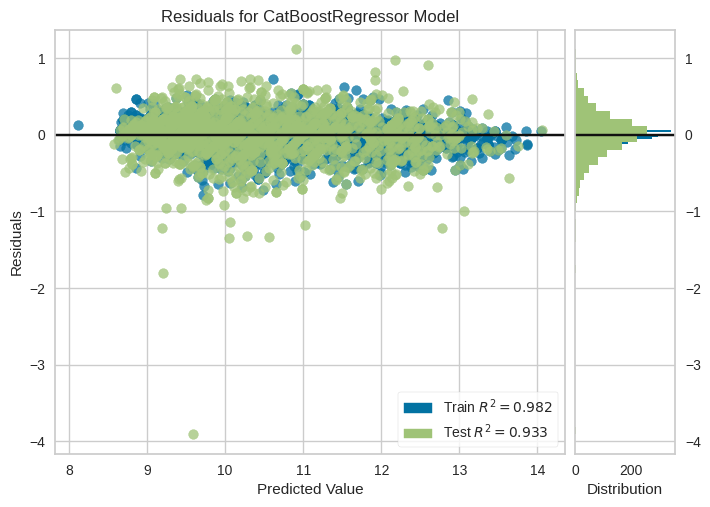

In [ ]:
# plot residuals
plot_model(best, plot = 'residuals')

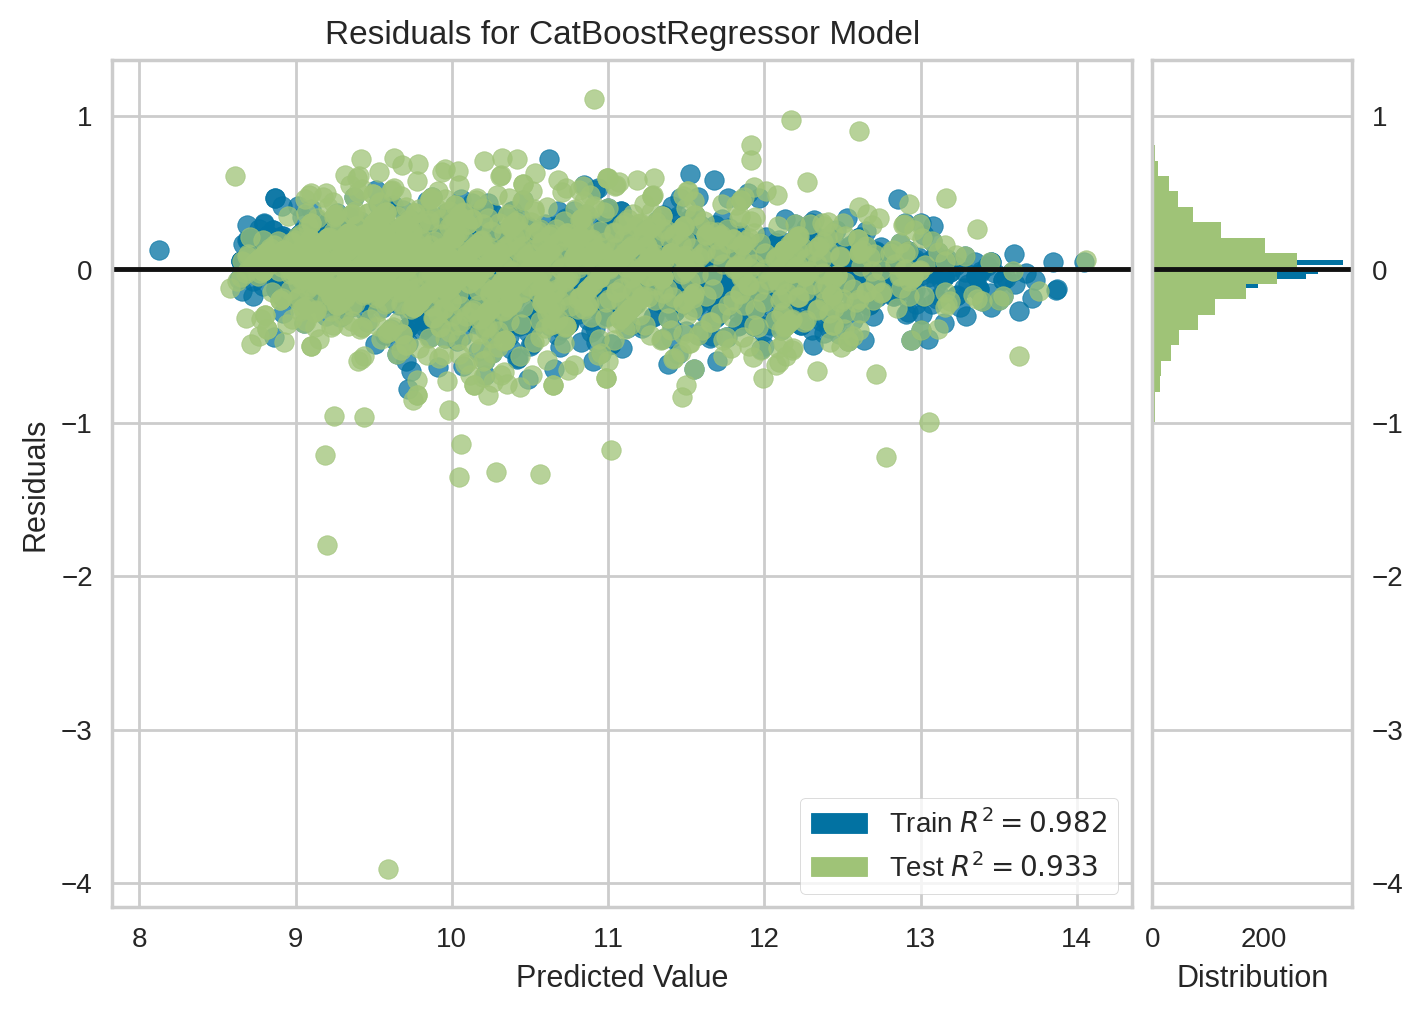

In [ ]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [ ]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

## ✅ Interpret Model

In [ ]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2396,0.1019,0.3192,0.9345,0.0273,0.0226
1,0.2543,0.1143,0.3381,0.9286,0.0294,0.0243
2,0.2471,0.1132,0.3364,0.9226,0.0292,0.0235
3,0.2306,0.0895,0.2991,0.9444,0.0254,0.0216
4,0.2438,0.1081,0.3288,0.9275,0.0282,0.0229
5,0.2494,0.1119,0.3345,0.9241,0.0291,0.0238
6,0.2447,0.1134,0.3367,0.9209,0.0293,0.0236
7,0.2394,0.1001,0.3163,0.9272,0.0275,0.0229
8,0.2556,0.1175,0.3428,0.9272,0.0296,0.0241


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

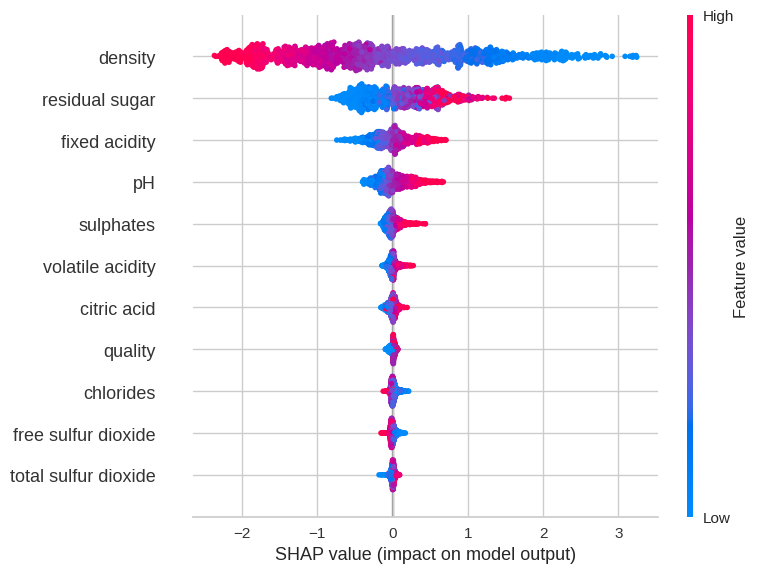

In [ ]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [ ]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

## ✅ Get Leaderboard

In [ ]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/37 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.2981,0.2317,0.4419,0.8508,0.0351,0.0287
1,Lasso Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.8560,1.1216,1.0589,0.2625,0.0901,0.0809
2,Ridge Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.7018,0.7721,0.8784,0.4924,0.0755,0.0667
3,Elastic Net,"(TransformerWrapper(include=['fixed acidity', ...",0.8382,1.0892,1.0434,0.2838,0.0887,0.0791
4,Least Angle Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.2981,0.2317,0.4419,0.8508,0.0351,0.0287
5,Lasso Least Angle Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.8560,1.1216,1.0589,0.2625,0.0901,0.0809
6,Orthogonal Matching Pursuit,"(TransformerWrapper(include=['fixed acidity', ...",0.8912,1.2054,1.0978,0.2072,0.0937,0.0845
7,Bayesian Ridge,"(TransformerWrapper(include=['fixed acidity', ...",0.2983,0.2318,0.4421,0.8508,0.0351,0.0287
8,Passive Aggressive Regressor,"(TransformerWrapper(include=['fixed acidity', ...",1.7822,5.3590,2.0172,-2.4550,0.2075,0.1721


In [ ]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleIm...
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=None,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=-1,
                                                           num_parallel_tree=None,
                                                           random_state=123, ...))],
                                 n_jobs=-1)]])

## ✅ AutoML

In [ ]:
# find best model based on CV metrics
automl()

## ✅ Dashboard

In [ ]:
# dashboard function
dashboard(dt, display_format ='inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ✅Create App

In [ ]:
# create gradio app
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://601e62b575df85c236.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## ✅ Create API

In [ ]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


## ✅ Create Docker

In [ ]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [ ]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [ ]:
# check out the requirements file created with this magic command
# %load requirements.txt

## ✅ Finalize Model

In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7ef31df89870>)])

## ✅ Convert Model

In [ ]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double score(double[] input) {
        double var0;
        if (input[7] <= 0.9923750162124634) {
            if (input[7] <= 0.9903150200843811) {
                if (input[7] <= 0.9896450042724609) {
                    if (input[7] <= 0.9885800182819366) {
                        if (input[7] <= 0.9877000153064728) {
                            if (input[6] <= 103.0) {
                                if (input[4] <= 0.03349999897181988) {
                                    if (input[3] <= 1.25) {
                                        var0 = 13.600000381469727;
                                    } else {
                                        var0 = 13.5;
                                    }
                                } else {
                                    var0 = 13.899999618530273;
                                }
                            } else {
                                var0 = 14.0;
                            }
  

## ✅ Deploy Model

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

## ✅ Save / Load Model

In [ ]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7ef3f88188b0>)

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7ef3d97f6800>)])

## ✅ Save / Load Experiment

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,6119
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple
